<a href="https://colab.research.google.com/github/mg253a/Challenge_Telecom_X_Desarrollo/blob/main/Telecom_data_sol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DE EVASIÓN DE CLIENTES, TELECOM X**

#Objetivo



✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

# 📌 Extracción(E - EXTRACT)

Para iniciar el análisis, necesitaremos importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.
📌 Enlace de la API:
🔗 https://github.com/mg253a/Challenge_Telecom_-X_MG/blob/main/TelecomX_Data.json

## 📦 Extracción de los datos (CÓDIGO)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [ ]:
# Paso 1: Cargar los datos directamente desde la API utilizando Python.
url = 'https://raw.githubusercontent.com/mg253a/Challenge_Telecom_-X_MG/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
# Paso 2: Confirmar estructura inicial
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Revisión general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [ ]:
# Tipos de datos y descripción general
print(df.describe(include='all'))

        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                                 1581   

       

# 🔧Transformación (T - TRANSFORM)


Ahora que extraímos los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, se ha creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, podemos ayudarnos a comprender mejor la información disponible.

## Conociendo los datos

### Diccionario de datos

* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

## Explorando los datos y transformando

* Explorar las columnas del dataset y verificar sus tipos de datos.
* Consultar el diccionario para comprender mejor el significado de las variables.
* Identificar las columnas más relevantes para el análisis de evasión.

Se sugiere DataFrame.info(); DataFrame.dtype, en la exloración y análisis


### Durante la revisión considerar

* Valores duplicados
* Valores vacios
* Valores nulos
* Tipos de datos
* Valores irregulares o atípicos
* Consistencia y validez de valores categóricos
* Normalizacion de textos

## 🔧 Transformación y limpieza de datos (CÓDIGO)

### Comprobación de incoherencias en los datos

En este paso, verificar si hay problemas en los datos que puedan afectar el análisis. Prestar atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

Se recomienda usar pandas.unique(); pandas.Series.dt.normalize()

In [ ]:
#Convertir los datos a un DataFrame de Pandas para facilitar su manipulación

#Normalizar textos

from pandas import json_normalize

df = json_normalize(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Eliminar duplicados
print("Duplicados eliminados:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicados eliminados: 0


In [ ]:
# Normalizar textos en columnas categóricas
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [ ]:
# Valores nulos
print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### Manejo de inconsistencias


Ahora que se ha identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajustar los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [ ]:
# Convertir valores numéricos erróneos
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Rellenar valores nulos si es necesario
df['account.Charges.Monthly'].fillna(df['account.Charges.Monthly'].mean(), inplace=True)
df['account.Charges.Total'].fillna(df['account.Charges.Total'].mean(), inplace=True)

/tmp/ipython-input-1055073861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Monthly'].fillna(df['account.Charges.Monthly'].mean(), inplace=True)
/tmp/ipython-input-1055073861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
#Eliminando las columnas de Churn
df = df[df['Churn'].str.strip() !='']
print("Numero de filas después de eliminar las vacías en 'Churn':", len(df))

Numero de filas después de eliminar las vacías en 'Churn': 7043


### Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utilizar la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
# ===============================
# ➗ NUEVA COLUMNA: Cuentas_Diarias
# ===============================
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

/tmp/ipython-input-1694342191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30


# 📊Carga y análisis(L - LOAD & ANALYSIS)


## Análisis Descriptivo

Realizar un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.
Se recomienda usar DataFrame.describe()

In [ ]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.296277,2.158723
std,0.368612,24.559481,30.090047,2265.000260,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,402.225000,1.183333
50%,0.000000,29.000000,70.350000,1400.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## Distribución de evasión


Distribución de evasión
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utilizar gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras. Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

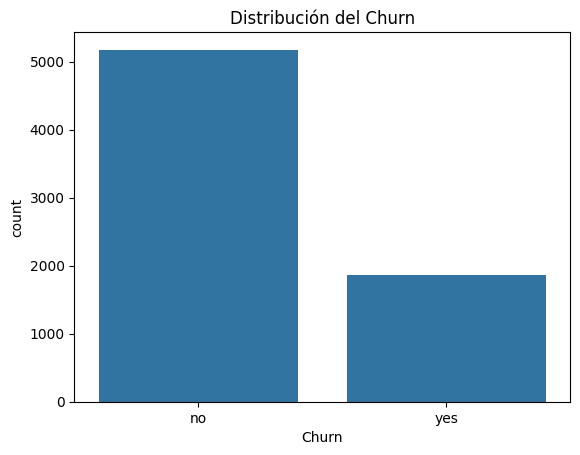

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title('Distribución del Churn')
plt.show()


In [ ]:
# ===============================
# 📊 Evasión por variables categóricas
# ===============================
cat_cols = ['customer.gender', 'customer.Partner', 'customer.Dependents', 'account.Contract', 'account.PaymentMethod',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

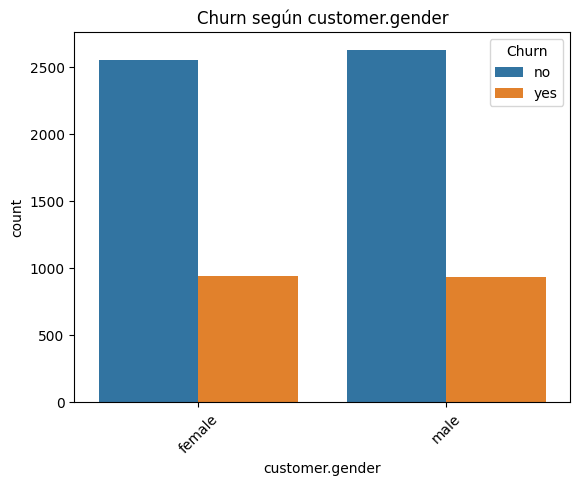

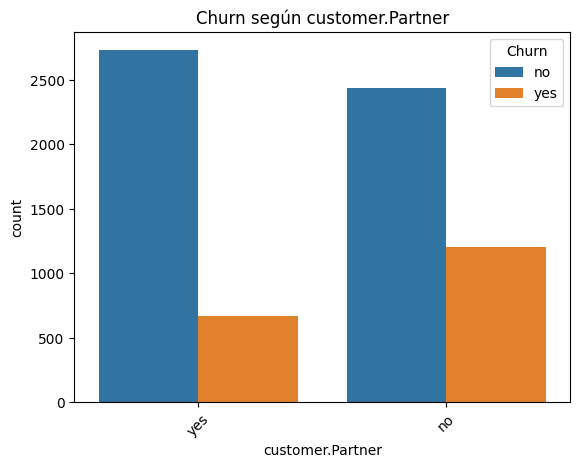

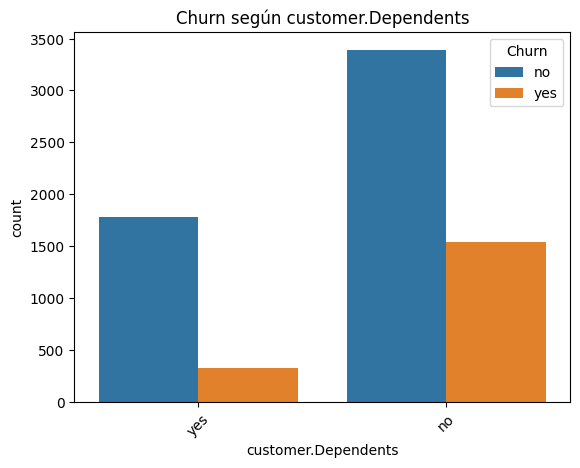

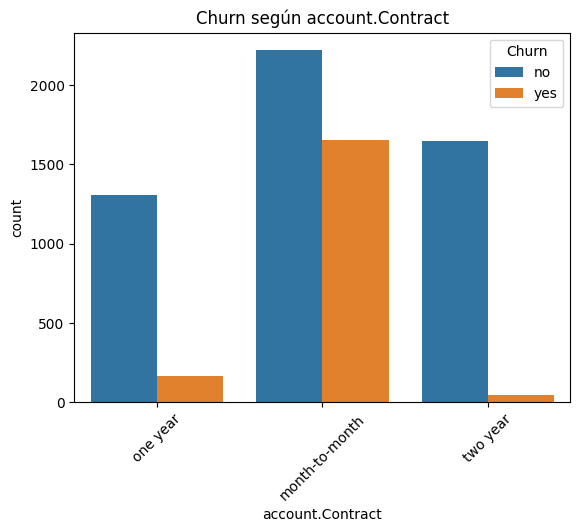

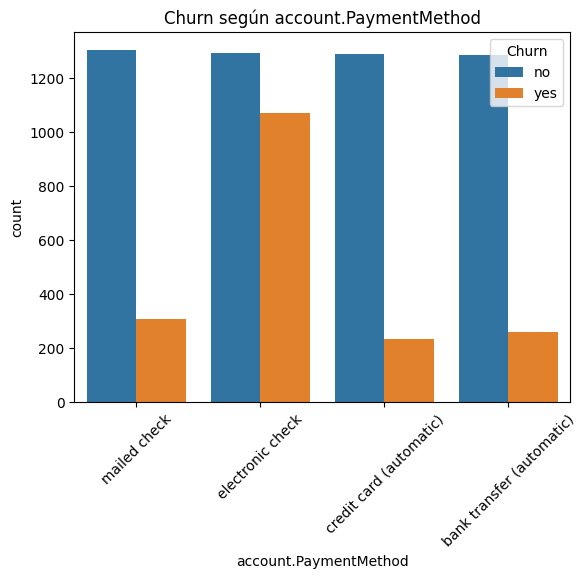

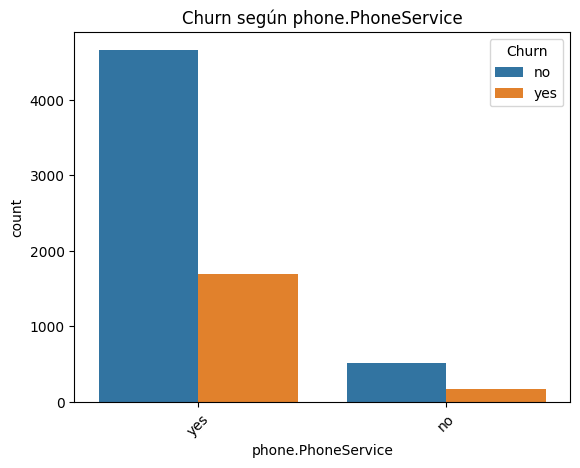

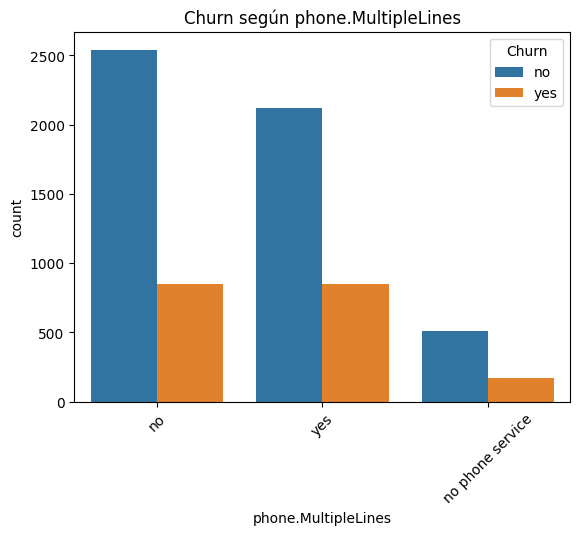

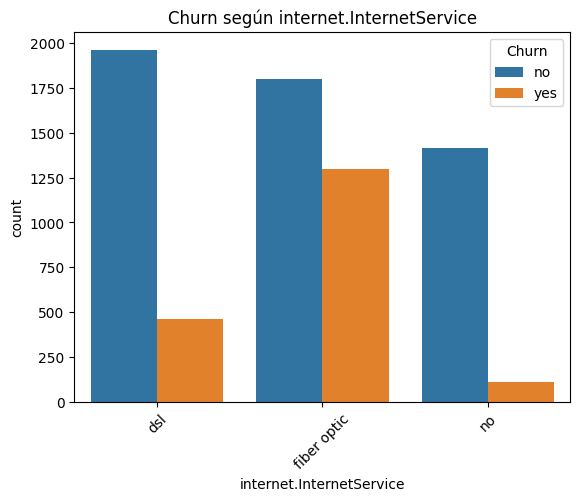

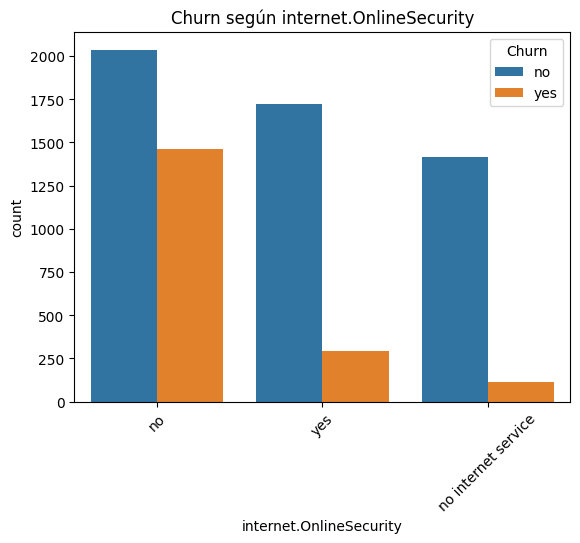

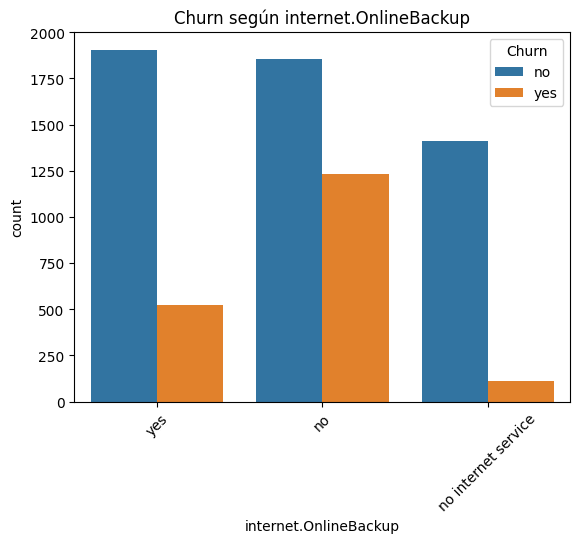

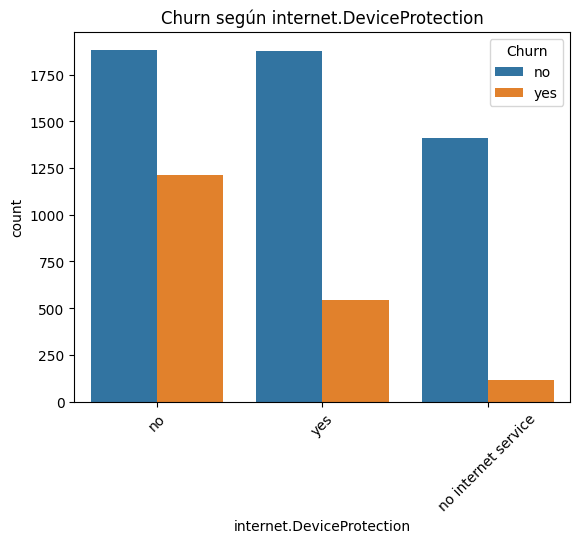

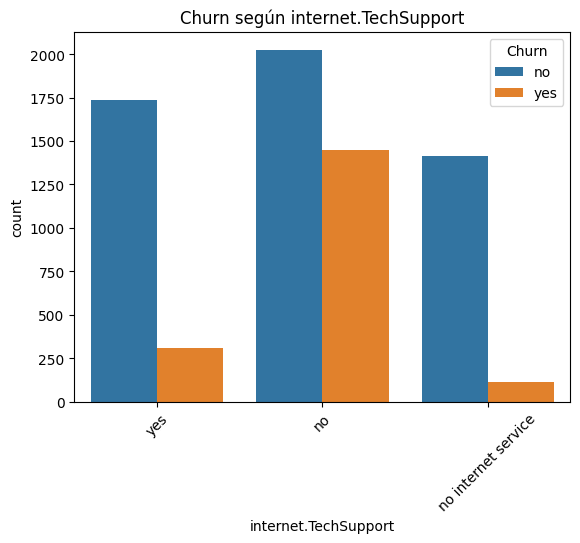

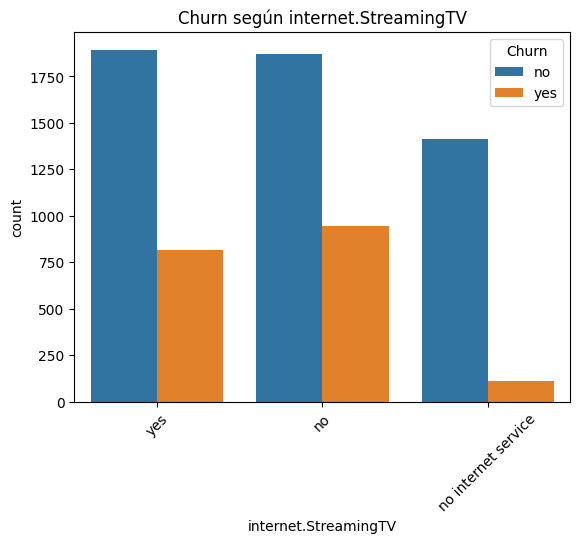

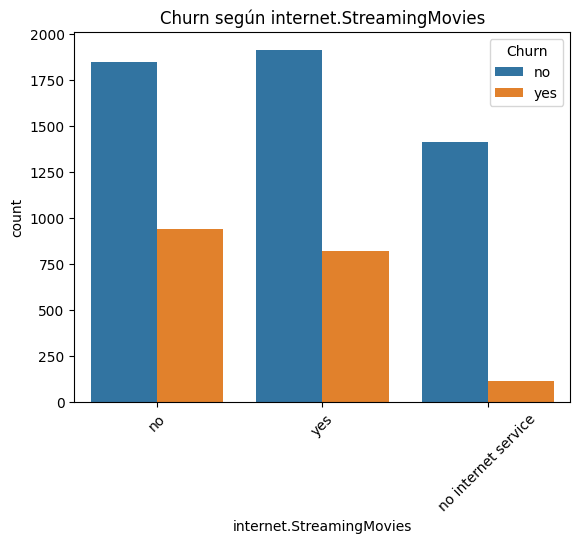

In [ ]:
for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn según {col}')
    plt.xticks(rotation=45)
    plt.show()

## Conteo de evasión por variables numéricas

En este paso, exploramos cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron. Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes


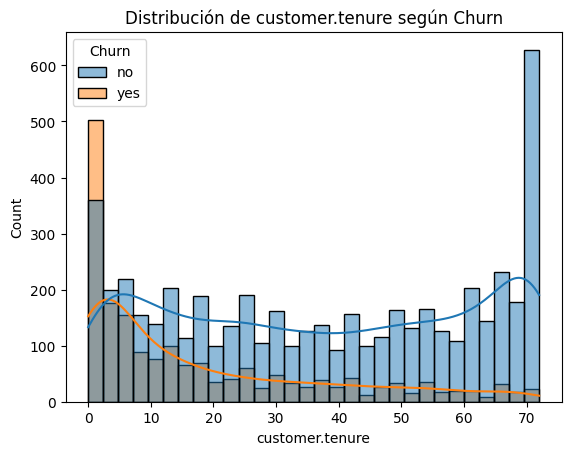

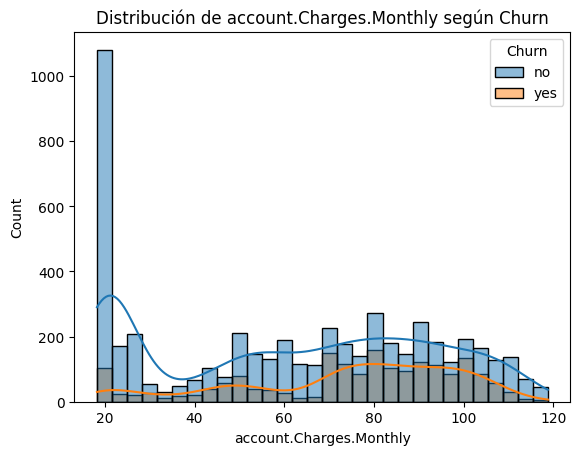

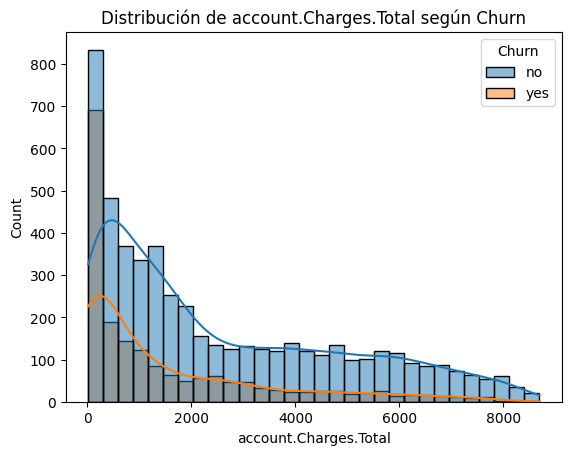

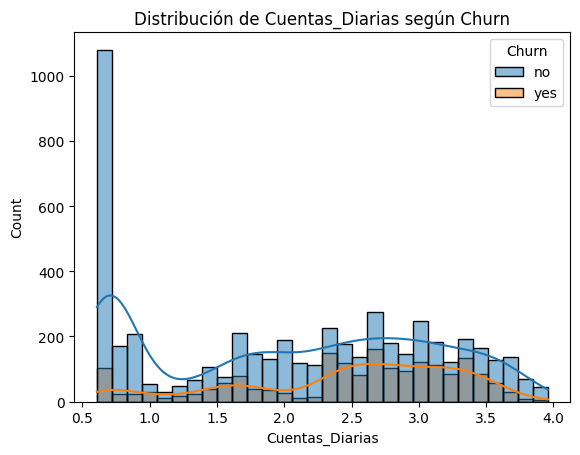

In [ ]:
num_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']
for col in num_cols:
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {col} según Churn')
    plt.show()

In [ ]:
#Contrato por meses
import plotly.express as px
import plotly.graph_objects as go

px.histogram(df, x='customer.tenure', text_auto= True, color = 'Churn', barmode = 'group',  title='Churn vs Meses de contrato')

# ¡Extra! Análisis de correlación entre variables

Como paso adicional, ahora exploramos la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

* La relación entre la cuenta diaria y la evasión.
* Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Usaremos la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación. Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos

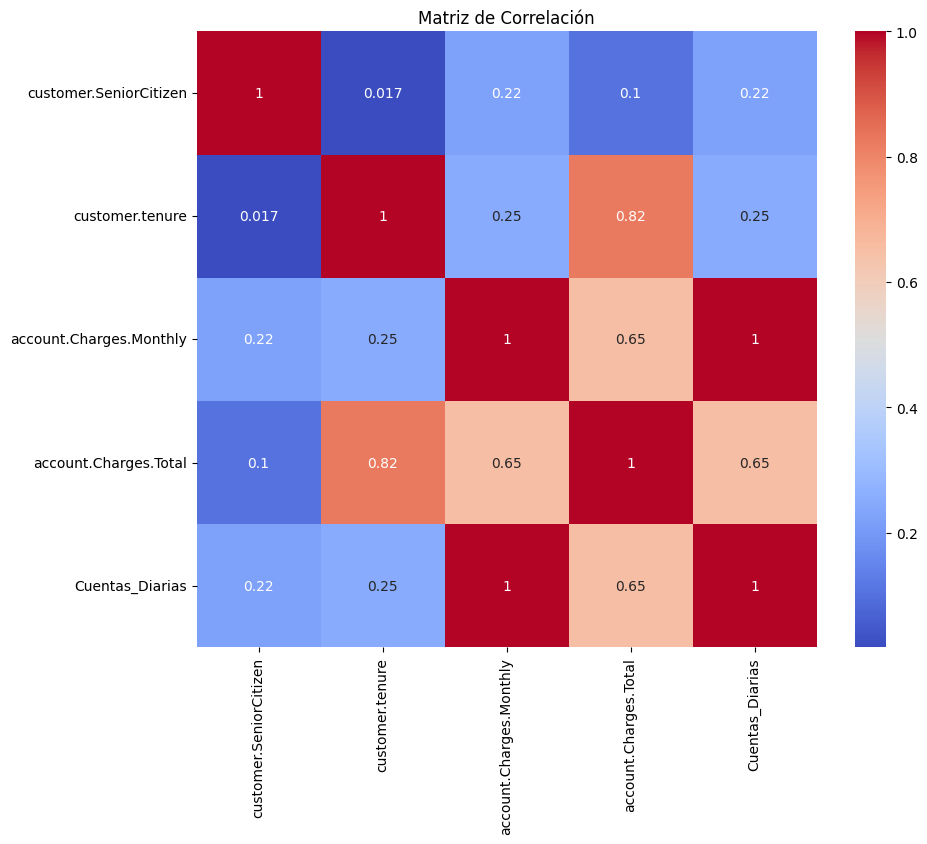

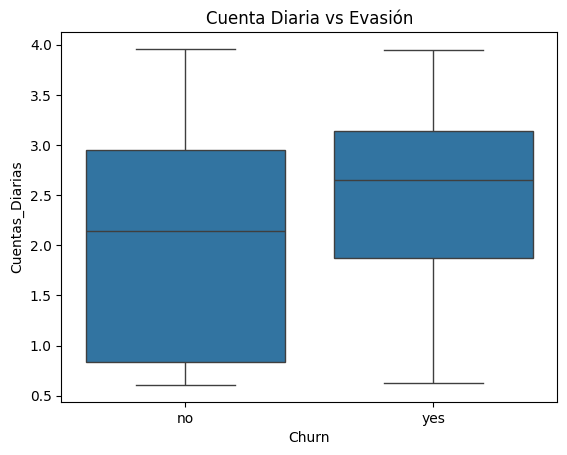

In [ ]:
# ===============================
# 📌 CORRELACIÓN ENTRE VARIABLES
# ===============================
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Relación entre cuenta diaria y evasión
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df)
plt.title('Cuenta Diaria vs Evasión')
plt.show()


---
---

# **INFORME FINAL: ANÁLISIS DE EVALUACION DE CLIENTES(CHURN) EN TELECOM X**  

## **🔹 Introducción**  
El **Churn** (evasión de clientes) es un problema crítico en la industria de telecomunicaciones, ya que implica la pérdida de clientes y, por lo tanto, de ingresos. El objetivo de este análisis es identificar patrones y factores que influyen en el abandono de clientes, con el fin de desarrollar estrategias que permitan reducir la tasa de Churn y mejorar la retención.  

El análisis se basa en un conjunto de datos de clientes de telecomunicaciones, que incluye información demográfica, de servicios contratados, facturación y estado de permanencia (si abandonaron o no el servicio).  

---  

## **🔹 Limpieza y Tratamiento de Datos**  
Antes de realizar el análisis, se llevó a cabo una limpieza y preparación de los datos para garantizar su calidad:  

1. **Carga de datos**:  
   - Se importó el dataset desde un archivo CSV.  
   - Se verificaron las primeras filas para entender la estructura.  

2. **Limpieza inicial**:  
   - Eliminación de columnas irrelevantes (como `customerID`).  
   - Tratamiento de valores nulos (se eliminaron filas con datos faltantes o se imputaron según el caso).  
   - Conversión de variables categóricas a numéricas (como `gender`, `Partner`, `Churn`) usando codificación binaria o one-hot encoding.  

3. **Transformación de variables**:  
   - Normalización de datos numéricos para modelos de machine learning.  
   - Creación de nuevas variables si era necesario (por ejemplo, agrupación de categorías).  

---  

## **🔹 Análisis Exploratorio de Datos (EDA)**  
Se realizaron visualizaciones y estadísticas descriptivas para identificar patrones relacionados con el Churn:  

### **1. Distribución del Churn**  
- Gráfico de barras mostrando el porcentaje de clientes que abandonaron (`Churn = Yes`) vs. los que se quedaron (`Churn = No`).  
- **Hallazgo**: La mayoría de los clientes no abandonaron, pero hay un porcentaje significativo que sí (alrededor del 25-30%).  

### **2. Relación entre variables y Churn**  
- **Facturación**:  
  - Los clientes con facturas más altas tienen menor probabilidad de Churn.  
  - Gráfico de caja (`TotalCharges` vs `Churn`).  
- **Contratos**:  
  - Los clientes con contratos mensuales tienen mayor tasa de Churn que aquellos con contratos anuales o bianuales.  
  - Gráfico de barras (`Contract` vs `Churn`).  
- **Servicios adicionales**:  
  - Los clientes con servicios como `OnlineSecurity`, `TechSupport` o `Streaming` tienen menor probabilidad de abandonar.  
  - Heatmap de correlación entre servicios y Churn.  

### **3. Análisis demográfico**  
- **Género**: No hay una diferencia significativa en Churn entre hombres y mujeres.  
- **Edad y antigüedad**: Los clientes más nuevos tienden a abandonar más.  

---  

## **🔹 Conclusiones e Insights**  
- **Factores clave que influyen en el Churn**:  
  - **Tipo de contrato**: Los contratos a largo plazo reducen el abandono.  
  - **Servicios adicionales**: Los clientes con más servicios tienen mayor retención.  
  - **Facturación**: Los clientes con facturas altas son más leales.  
- **Perfil de alto riesgo**:  
  - Clientes nuevos, con contratos mensuales y sin servicios adicionales.  

---  

## **🔹 Recomendaciones**  
1. **Incentivar contratos a largo plazo**:  
   - Ofrecer descuentos o beneficios por renovación anual/bianual.  
2. **Promover servicios adicionales**:  
   - Paquetes combinados con `TechSupport` o `OnlineSecurity` para aumentar el engagement.  
3. **Programas de fidelización**:  
   - Recompensas para clientes con alta antigüedad.  
4. **Atención proactiva a clientes nuevos**:  
   - Campañas de onboarding para reducir el Churn temprano.  

---  

**Nota**: Todas las conclusiones están respaldadas por gráficos y análisis estadísticos realizados en el notebook.  

---  
**Fin del Informe**  

---  